# Assignment#5-3

```bash
수업 : 컴퓨터 비전(Computer Vision
교수님 : 김낙현 교수님

이름 : 김주원
학과 : 컴퓨터전자시스템공학부
학번 : 201600765
과제제출일 : 2022-05-20
```

## 과제 내용
#### 3. 문제 1의 프로그램을 다음 장의 그림과 같이 확장하여 프로그램을 구현하고 결과의 정확도를 측정하라.  Hidden 1과 Hidden 3를 다음 그림과 같이 두 단계로 확장한다. Convolution을 반복 수행하고, max pooling은 두번째 단계에서만 수행
- 과제 수행방법: 8장 기계학습 D 실습 내용을 활용해서 코딩을 진행하였습니다. 아래와 같이 기존에 D의 코드를 Conv2D를 두개 더 실행해주었고, 사이즈가 변화할 때 마다 max pooling을 실행해주어 과제의 조건에 부합하도록 코드를 수정하였습니다. 각 Hidden Layer에서 매개변수 수는 9248, 18496, 36928, 36928개입니다. 또한, 문제 2에서 얼마나 개선되었는지 파악하기 위해서 maxpooling이후 dropout을 진행해주었습니다.   
```python
model.add(layers.Conv2D(32, (3,3), padding="SAME", activation='relu', input_shape=(32, 32, 3)))# Conv2D
model.add(layers.Conv2D(32, (3,3), padding="SAME", activation='relu'))#Hidden 1
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3,3), padding="SAME", activation='relu'))#Hidden 2
model.add(layers.Conv2D(64, (3,3), padding="SAME", activation='relu'))#Hidden 3
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3,3), padding="SAME", activation='relu'))#Hidden 4
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())#  (4, 4, 64) 출력을 1,024 크기로 펼침
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
```
- 수행결과 : 이전 과제 1에서의 학습, 검증, 테스트 데이터에 대한 정확도는 0.8782, 0.7482, 0.7275입니다. Dropout을 적용한 과제2에서 학습, 검증, 테스트데이터에 대한 정확도는 0.7943, 0.7846, 0.7674입니다. 마지막 과제 3에서 진행한 코드에서 학습, 검증, 테스트 데이터에 대한 정확도는  0.8339, 0.8136, 0.7977입니다. 과제 2에 비해서 학습, 검증, 테스트 데이터에 대한 성능이 모두 좋아진 것을 확인하실 수 있으며, 과제 1에 비해서 검증, 테스트 데이터에 대한 정확도가 크게 개선된 것을 확인하실 수 있습니다. 신경망의 층을 조금 더 깊게 쌓아가면서 성능 개선이 이뤄진것을 보실 수 있습니다. 

## 관련 라이브러리 및 패키지 import 

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers

# 관련 패키지
import numpy as np
import matplotlib.pyplot as plt

## Cifar 데이터 읽어 오기
- Keras data로 읽을 수 있음

In [2]:
# 영상 파일 읽기
cifar10 = keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

## 영상 전처리
- 영상의 픽셀값이 [0, 255]로 되어있는데, [0,1] 범위로 변경

In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Keras 신경망
- 신경망 구조 : 아래 구조를 문제에 맞게 변환
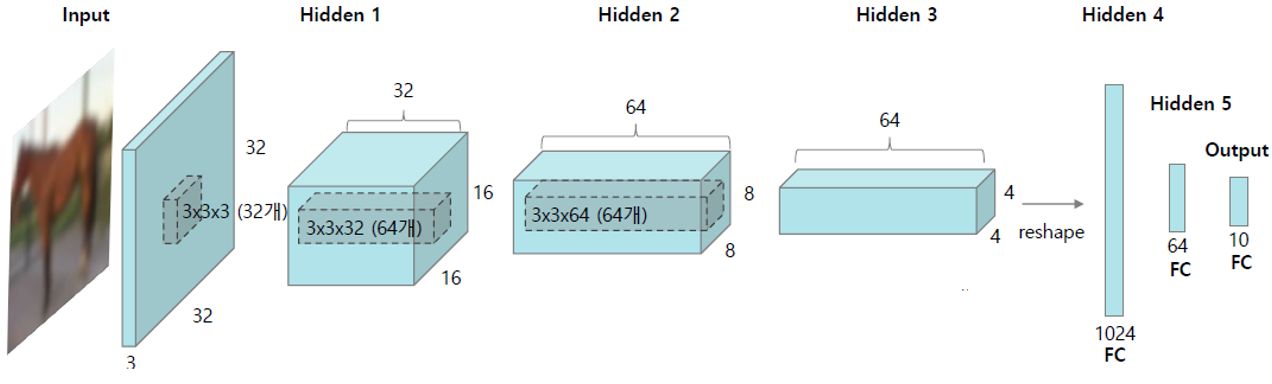
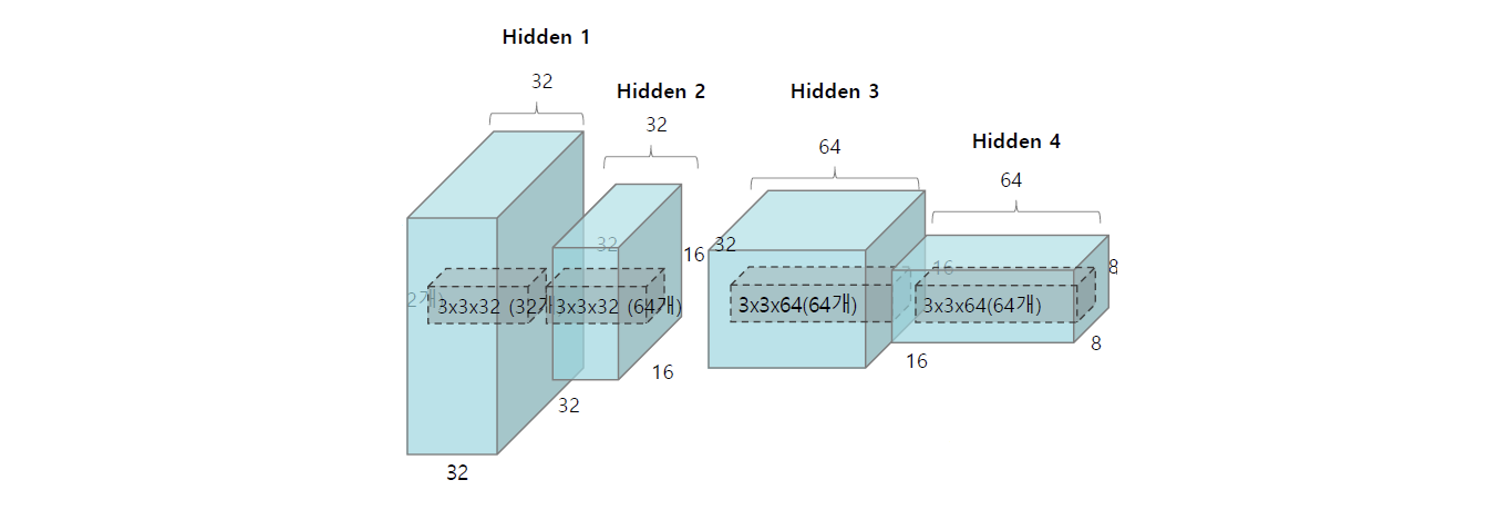

In [4]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), padding="SAME", activation='relu', input_shape=(32, 32, 3)))# Conv2D
model.add(layers.Conv2D(32, (3,3), padding="SAME", activation='relu'))#Hidden 1
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3,3), padding="SAME", activation='relu'))#Hidden 2
model.add(layers.Conv2D(64, (3,3), padding="SAME", activation='relu'))#Hidden 3
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3,3), padding="SAME", activation='relu'))#Hidden 4
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())#  (4, 4, 64) 출력을 1,024 크기로 펼침
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 파라미터 수 읽기
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

## 모델 훈련 부분 구현

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
# 실습 1.에 나와있는 예시대로 수렴을 위해 epochs=20으로 진행하였음
batch_size = 64
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
model.fit(train_images, train_labels,
          batch_size=batch_size,
          validation_split = 0.1,
          epochs=20,
          callbacks=[early_stop])

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\n테스트 정확도:', test_acc)

2022-05-19 11:50:59.758739: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/20
704/704 [==============================] - 81s 114ms/step - loss: 1.6564 - accuracy: 0.3864 - val_loss: 1.2384 - val_accuracy: 0.5598
Epoch 2/20
704/704 [==============================] - 67s 95ms/step - loss: 1.1768 - accuracy: 0.5774 - val_loss: 0.9785 - val_accuracy: 0.6594
Epoch 3/20
704/704 [==============================] - 47s 67ms/step - loss: 1.0077 - accuracy: 0.6442 - val_loss: 0.9538 - val_accuracy: 0.6706
Epoch 4/20
704/704 [==============================] - 48s 68ms/step - loss: 0.9014 - accuracy: 0.6789 - val_loss: 0.8273 - val_accuracy: 0.7150
Epoch 5/20
704/704 [==============================] - 48s 68ms/step - loss: 0.8352 - accuracy: 0.7041 - val_loss: 0.7563 - val_accuracy: 0.7396
Epoch 6/20
704/704 [==============================] - 48s 68ms/step - loss: 0.7738 - accuracy: 0.7286 - val_loss: 0.7525 - val_accuracy: 0.7408
Epoch 7/20
704/704 [==============================] - 48s 68ms/step - loss: 0.7248 - accuracy: 0.7446 - val_loss: 0.6918 - val_accuracy

## 실험 영상 보기




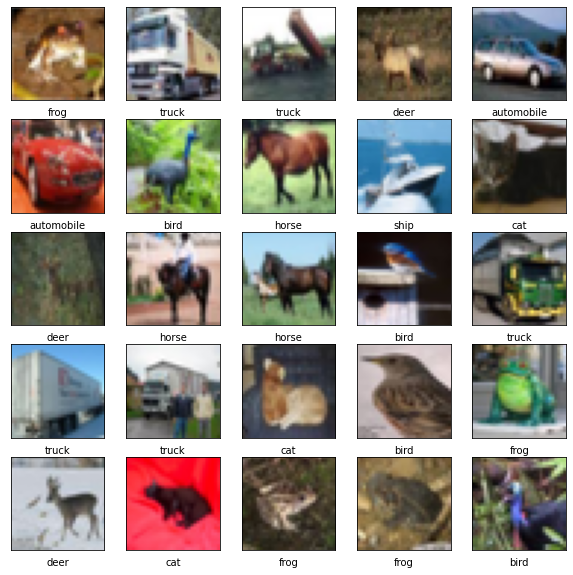

In [6]:
# 클래스 이름 설정 
# class 명칭을 지정해 줌
class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

train_labels = train_labels.flatten()
test_labels = test_labels.flatten()

# Train image 25장 디스플레이
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


## Test 영상 예측 결과 display 함수

In [7]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

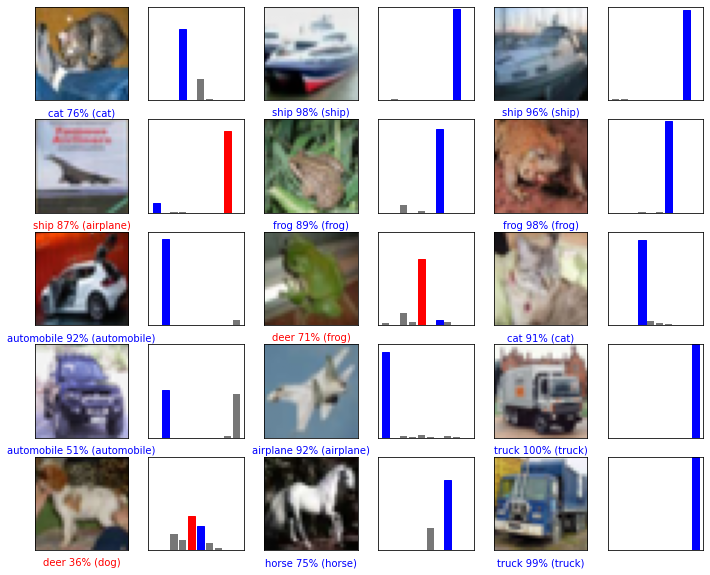

In [8]:
predictions = model.predict(test_images)

# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 표시
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()
